Gate detection testing

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Reusing M.Sargent's `resize` and `preprocess` functions from [his repo](https://github.com/mesargent/freeway_guide_sign_detector)


Added python 3 support to `preprocess`

In [3]:
def resize(img, scale):
    return cv2.resize(img, (int(img.shape[1] * scale), int(img.shape[0] * scale) ))

# 2nd param now takes a list to handle python3
def preprocess(image, low_up_list):
    lower = np.array(low_up_list[0], dtype="uint8")
    upper = np.array(low_up_list[1], dtype="uint8")
    
    mask = cv2.inRange(image, lower, upper)
    output = cv2.bitwise_and(image, image, mask = mask)
    
    return output, mask

In [4]:
img = cv2.imread("../../../img/third_run/front9.jpg")

if img.shape[0] > 400:
    scale = 400.0 / img.shape[0]
else:
    scale = 1
    
img = resize(img, scale)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB) )
plt.show()
# max 255 - 50 for red and yellow
# filter out blue - leave some no more than 100 test

AttributeError: 'NoneType' object has no attribute 'shape'

convert to grayscale:

In [5]:
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(imgray, cmap='gray')
plt.show()

error: /tmp/opencv-20170916-87764-1y5vj25/opencv-3.3.0/modules/imgproc/src/color.cpp:10638: error: (-215) scn == 3 || scn == 4 in function cvtColor


## Trying different thresholds
1. Global:
2. Adaptive:
   * Mean C
   * Gaussian C

#### Global Thresholds

Combined THRESH_BINARY and THRESH_OTSU

In [1]:
flag, binary_img = cv2.threshold(imgray, 85, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
#flag, binary_img = cv2.threshold(imgray, 127, 255, cv2.THRESH_TOZERO)
pimage1, mask = preprocess(img1, [ lower_blue, upper_blue ])
plt.figure(figsize=(10, 6) )
plt.imshow(binary_img, cmap='gray')
plt.show()

NameError: name 'cv2' is not defined

#### Adaptive Thresholds

`ADAPTIVE THRESH MEAN C`:

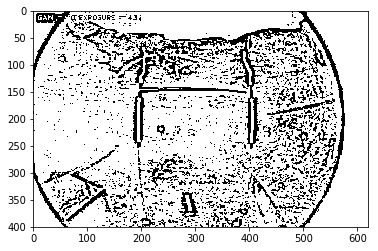

In [13]:
ad_thresh_1 = cv2.adaptiveThreshold(imgray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
plt.imshow(ad_thresh_1, cmap='gray')
plt.show()

`ADAPTIVE THRESHOLD GAUSSIAN C`:

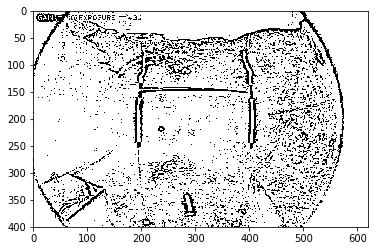

In [14]:
ad_thresh_2 = cv2.adaptiveThreshold(imgray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
plt.imshow(ad_thresh_2, cmap='gray')
plt.show()